<img src="https://i0.wp.com/turbolab.in/wp-content/uploads/2021/09/Text-Summarization-NLP.jpg?fit=1000%2C579&ssl=1">

https://en.wikipedia.org/w/api.php

<h1>Text Summarization:</h1>

 - <p>Abstractive Summarization</p>
 - <p>Extractive Summarization</p>

In [1]:
# !pip install transformers

In [2]:
import requests
from transformers import AutoTokenizer

import nltk
nltk.download("stopwords")
nltk.download("punkt")
import re
import string

from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize as nltk_sent_tokenize
from nltk.tokenize import word_tokenize as nltk_word_tokenize

from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer
import numpy as np
from nltk.corpus import stopwords

from scipy.spatial.distance import cosine

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
def fetch_and_save_wiki(title):
    
    response = requests.get(
          "https://en.wikipedia.org/w/api.php",

          params = {
              "action":"query",
              "format" : "json",
              "titles": title,
              "prop" :"extracts",
              "explaintext": True
          }
          ).json()

    page = next(iter(response["query"]["pages"].values()))
    wiki_text = page["extract"]

    return wiki_text


In [4]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [5]:
# List of Indian cricket team players
indian_cricket_players = [
    "Virat Kohli",
    "Rohit Sharma",
    "Jasprit Bumrah",
    "Ravichandran Ashwin",
    "MS Dhoni",
    "Sachin Tendulkar",
    "Sourav Ganguly",
    "Kapil Dev",
    "Anil Kumble",
    "Yuvraj Singh",
    "Virender Sehwag",
    "Sunil Gavaskar",
    "Rahul Dravid",
    "Mohammed Shami",
    "Hardik Pandya"
]

data = []

for player in indian_cricket_players:
    info = fetch_and_save_wiki(player)
    tokens = tokenizer.encode(info , add_special_tokens = True , truncation = True , max_length = 30000)
    num_tokens = len(tokens)
    data.append([player , info , num_tokens])


In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(data , columns = ["indian_cricket_player" , "player_information" , "num_tokens"])
df.head(20)

,indian_cricket_player,player_information,num_tokens
0,Virat Kohli,Virat Kohli (Hindi pronunciation: [ʋɪˈɾɑːʈ ˈko...,6372
1,Rohit Sharma,Rohit Gurunath Sharma (born 30 April 1987) is ...,5433
2,Jasprit Bumrah,Jasprit Jasbirsingh Bumrah (born 6 December 19...,5567
3,Ravichandran Ashwin,Ravichandran Ashwin () (born 17 September 1986...,6266
4,MS Dhoni,Mahendra Singh Dhoni ( ; born 7 July 1981) is ...,6060
5,Sachin Tendulkar,"Sachin Tendulkar, ( ; pronounced [sətɕin teːɳɖ...",15654
6,Sourav Ganguly,Sourav Chandidas Ganguly ( ; natively spelled ...,7316
7,Kapil Dev,Kapil Dev Nikhanj (Pronunciation: [kəpil deːʋ]...,7097
8,Anil Kumble,Anil Kumble (; born 17 October 1970) is an Ind...,5285
9,Yuvraj Singh,Yuvraj Singh (born 12 December 1981) is a form...,9231


In [8]:
def clean_text(text):
    """
    This function cleans the input text by removing non-alphanumeric characters, 
    converting the text to lowercase, and removing extra whitespace.

    Parameters:
    - text (str): The input text to be cleaned.

    Returns:
    - str: The cleaned text.
    """
    text = re.sub(r'[^A-Za-z0-9\s.\(\){}\[\]]+', '' , text)
    text = text.lower()
    text = " ".join(text.split())
    return text


def count_tokens(text):
    """
    This function counts the number of tokens in the input text using a tokenizer.
    If the text length exceeds the maximum sequence length supported by the model,
    it truncates the text to fit within the maximum length.

    Parameters:
    - text (str): The input text to be tokenized.

    Returns:
    - int: The number of tokens in the text.
    """
    max_sequence_length = 30000
    
    # Truncate the text if it exceeds the maximum sequence length
    if len(tokenizer.encode(text, add_special_tokens=True)) > max_sequence_length:
        text = text[:max_sequence_length]
    tokens = tokenizer.encode(text, add_special_tokens=True)
    return len(tokens)



In [9]:
df["player_information_cleaned"] = df['player_information'].apply(clean_text)

In [10]:
df["cleaned_token_player"] = df["player_information_cleaned"].apply(count_tokens)

Token indices sequence length is longer than the specified maximum sequence length for this model (5712 > 512). Running this sequence through the model will result in indexing errors


In [11]:
df.head()

,indian_cricket_player,player_information,num_tokens,player_information_cleaned,cleaned_token_player
0,Virat Kohli,Virat Kohli (Hindi pronunciation: [ʋɪˈɾɑːʈ ˈko...,6372,virat kohli (hindi pronunciation [ koli] born ...,5712
1,Rohit Sharma,Rohit Gurunath Sharma (born 30 April 1987) is ...,5433,rohit gurunath sharma (born 30 april 1987) is ...,4991
2,Jasprit Bumrah,Jasprit Jasbirsingh Bumrah (born 6 December 19...,5567,jasprit jasbirsingh bumrah (born 6 december 19...,5061
3,Ravichandran Ashwin,Ravichandran Ashwin () (born 17 September 1986...,6266,ravichandran ashwin () (born 17 september 1986...,5738
4,MS Dhoni,Mahendra Singh Dhoni ( ; born 7 July 1981) is ...,6060,mahendra singh dhoni ( born 7 july 1981) is an...,5648


In [12]:
df['player_information_cleaned'][0]

'virat kohli (hindi pronunciation [ koli] born 5 november 1988) is an indian international cricketer and the former captain of the indian national cricket team. he is a righthanded batsman and an occasional mediumfast bowler. he currently represents royal challengers bengaluru in the ipl and delhi in domestic cricket. kohli is widely regarded as one of the greatest batsmen of all time. he holds the record as the highest runscorer in t20i and ipl ranks third in odi and stands as the fourthhighest in international cricket. he also holds the record for scoring the most centuries in odi cricket and stands second in the list of most international centuries scored. kohli was a key member of the indian team that won the 2011 cricket world cup 2013 icc champions trophy and captained india to win the icc test mace three consecutive times in 2017 2018 and 2019. in 2013 kohli was ranked number one in the icc rankings for odi batsmen. in 2015 he achieved the summit of t20i rankings. in 2018 he was

In [13]:
def sent_tokenize(text):
    """
    Tokenizes the input text into sentences using NLTK's sentence tokenizer.

    Parameters:
    - text (str): The input text to be tokenized into sentences.

    Returns:
    - list of str: List of sentences extracted from the input text.
    """
    sents = nltk_sent_tokenize(text)

    sent_filtered = []

    for s in sents:
        sent_filtered.append(s)
    return sent_filtered

def cleanup_sentences(text):
    """
    Cleans up the input sentences by removing punctuation, stop words, and converting words to lowercase.

    Parameters:
    - text (str): The input text containing sentences to be cleaned up.

    Returns:
    - list of str: List of cleaned sentences.
    """
    stop_words = set(stopwords.words("english"))
    sentences = sent_tokenize(text)

    sentences_cleaned = []

    for sent in sentences:
        words = nltk_word_tokenize(sent)
        words = [w for w in words if w not in string.punctuation]
        words = [w for w in words if not w.lower() in stop_words]
        words = [w.lower() for w in words]
        sentences_cleaned.append(" ".join(words))

    return sentences_cleaned

In [14]:
df["cleaned_sentences"] = df["player_information_cleaned"].apply(cleanup_sentences)

In [15]:
df.head()

,indian_cricket_player,player_information,num_tokens,player_information_cleaned,cleaned_token_player,cleaned_sentences
0,Virat Kohli,Virat Kohli (Hindi pronunciation: [ʋɪˈɾɑːʈ ˈko...,6372,virat kohli (hindi pronunciation [ koli] born ...,5712,[virat kohli hindi pronunciation koli born 5 n...
1,Rohit Sharma,Rohit Gurunath Sharma (born 30 April 1987) is ...,5433,rohit gurunath sharma (born 30 april 1987) is ...,4991,[rohit gurunath sharma born 30 april 1987 indi...
2,Jasprit Bumrah,Jasprit Jasbirsingh Bumrah (born 6 December 19...,5567,jasprit jasbirsingh bumrah (born 6 december 19...,5061,[jasprit jasbirsingh bumrah born 6 december 19...
3,Ravichandran Ashwin,Ravichandran Ashwin () (born 17 September 1986...,6266,ravichandran ashwin () (born 17 september 1986...,5738,[ravichandran ashwin born 17 september 1986 in...
4,MS Dhoni,Mahendra Singh Dhoni ( ; born 7 July 1981) is ...,6060,mahendra singh dhoni ( born 7 july 1981) is an...,5648,[mahendra singh dhoni born 7 july 1981 indian ...


In [16]:
df["cleaned_sentences"][0]

['virat kohli hindi pronunciation koli born 5 november 1988 indian international cricketer former captain indian national cricket team',
 'righthanded batsman occasional mediumfast bowler',
 'currently represents royal challengers bengaluru ipl delhi domestic cricket',
 'kohli widely regarded one greatest batsmen time',
 'holds record highest runscorer t20i ipl ranks third odi stands fourthhighest international cricket',
 'also holds record scoring centuries odi cricket stands second list international centuries scored',
 'kohli key member indian team 2011 cricket world cup 2013 icc champions trophy captained india win icc test mace three consecutive times 2017 2018 2019. 2013 kohli ranked number one icc rankings odi batsmen',
 '2015 achieved summit t20i rankings',
 '2018 ranked top test batsman making indian cricketer hold number one spot three formats game',
 'first player score 20000 runs decade',
 '2020 international cricket council named male cricketer decade',
 'received many acc

In [17]:
def get_tf_idf(sentences):
    if not sentences:
        return []  # Return an empty list if sentences are empty
    else:
        vectorizer = CountVectorizer()
        sent_word_matrix = vectorizer.fit_transform(sentences)

        if not vectorizer.vocabulary_:  # Check if vocabulary is empty
            return []  # Return an empty list if vocabulary is empty

        transformer = TfidfTransformer(norm=None, sublinear_tf=False, smooth_idf=False)
        tfidf = transformer.fit_transform(sent_word_matrix)
        tfidf = tfidf.toarray()

        centroid_vector = tfidf.sum(axis=0)
        centroid_vector = np.divide(centroid_vector, centroid_vector.max())

        feature_names = vectorizer.get_feature_names_out()

        relevant_vector_indices = np.where(centroid_vector > 0.3)[0]

        word_list = [feature_names[idx] for idx in relevant_vector_indices]

        return word_list


In [18]:
df["most_important_words"] = df["cleaned_sentences"].apply(get_tf_idf)

In [19]:
df.head()

,indian_cricket_player,player_information,num_tokens,player_information_cleaned,cleaned_token_player,cleaned_sentences,most_important_words
0,Virat Kohli,Virat Kohli (Hindi pronunciation: [ʋɪˈɾɑːʈ ˈko...,6372,virat kohli (hindi pronunciation [ koli] born ...,5712,[virat kohli hindi pronunciation koli born 5 n...,"[2017, 2018, also, brand, captain, centuries, ..."
1,Rohit Sharma,Rohit Gurunath Sharma (born 30 April 1987) is ...,5433,rohit gurunath sharma (born 30 april 1987) is ...,4991,[rohit gurunath sharma born 30 april 1987 indi...,"[2018, 2019, batsman, captain, centuries, cent..."
2,Jasprit Bumrah,Jasprit Jasbirsingh Bumrah (born 6 December 19...,5567,jasprit jasbirsingh bumrah (born 6 december 19...,5061,[jasprit jasbirsingh bumrah born 6 december 19...,"[2018, 2021, 2022, 2023, bowler, bowling, bumr..."
3,Ravichandran Ashwin,Ravichandran Ashwin () (born 17 September 1986...,6266,ravichandran ashwin () (born 17 september 1986...,5738,[ravichandran ashwin born 17 september 1986 in...,"[2010, 2016, ashwin, australia, bowler, cricke..."
4,MS Dhoni,Mahendra Singh Dhoni ( ; born 7 July 1981) is ...,6060,mahendra singh dhoni ( born 7 july 1981) is an...,5648,[mahendra singh dhoni born 7 july 1981 indian ...,"[2011, captain, cricket, cup, dhoni, first, ic..."


In [20]:
 df['most_important_words'][1]

['2018',
 '2019',
 'batsman',
 'captain',
 'centuries',
 'century',
 'cricket',
 'cup',
 'first',
 'icc',
 'india',
 'indian',
 'international',
 'match',
 'odi',
 'one',
 'record',
 'rohit',
 'runs',
 'scored',
 'series',
 'sharma',
 'team',
 'test',
 'tournament',
 'world',
 'year']

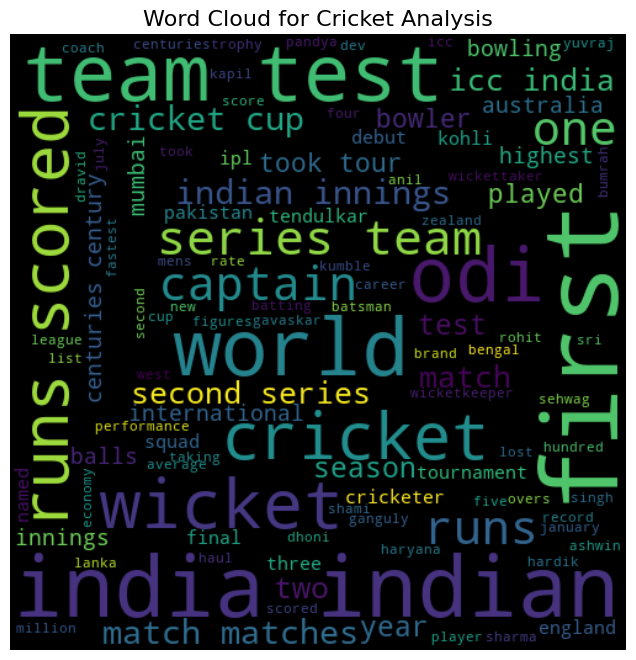

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the custom mask (cricket ball image)
cricket_mask = np.array(Image.open('ball-removebg.png'))

# Create a WordCloud object with custom parameters
wc = WordCloud(background_color='black', max_words=200, mask=cricket_mask)

# Generate the word cloud using the most important words data for cricket analysis
word_list = [word for sublist in df['most_important_words'] for word in sublist]
wc.generate(' '.join(word_list))

# Plot the word cloud with the custom mask
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Cricket Analysis', fontsize=16)
plt.axis('off')
plt.show()


In [22]:
def word_vector_cache(sentences, embedding_model):
    """
    Create a cache of word vectors for words present in the input sentences using a pre-trained word embedding model.

    Parameters:
    - sentences (list): A list of sentences or text data from which word vectors will be extracted.
    - embedding_model: A pre-trained word embedding model, such as Word2Vec or GloVe, used to obtain word vectors.

    Returns:
    - word_vectors (dict): A dictionary where each word is associated with its corresponding word vector.
    """

    # Initialize an empty dictionary to store word vectors
    word_vectors = dict()

    # Iterate over each sentence in the input list of sentences
    for sent in sentences:

        # Tokenize the sentence into individual words
        words = nltk_word_tokenize(sent)

        # Iterate over each word in the tokenized words
        for w in words:
            # Retrieve the word vector from the embedding model and add it to the word_vectors dictionary
            word_vectors.update({w: embedding_model.wv[w]})
    
    # Return the dictionary containing the cached word vectors
    return word_vectors


In [23]:
def build_embedding_representation(words, word_vectors, embedding_model):
    """
    Build an embedding representation for a list of words using pre-trained word vectors and an embedding model.

    Parameters:
    - words (list): A list of words for which embedding representation will be built.
    - word_vectors (dict): A dictionary containing cached word vectors for words.
    - embedding_model: A pre-trained word embedding model, such as Word2Vec or GloVe, used for vector representation.

    Returns:
    - embedding_representation (np.array): An embedding representation computed for the list of words.
    """

    # Initialize an array to store the embedding representation
    embedding_representation = np.zeros(embedding_model.vector_size, dtype='float32')

    # Create a set of keys from the word vectors dictionary for efficient lookup
    word_vector_key = set(word_vectors.keys())

    # Initialize a counter to keep track of the number of words with available vectors
    count = 0

    # Iterate over each word in the list of words
    for w in words:
        # Check if the word is present in the word_vectors dictionary
        if w in word_vector_key:
            # Add the word vector to the embedding representation
            embedding_representation = embedding_representation + word_vectors[w]
            count += 1

    # If there are words with available vectors, normalize the embedding representation
    if count != 0:
        embedding_representation = np.divide(embedding_representation, count)

    # Return the computed embedding representation
    return embedding_representation


In [24]:
def similarity(v1, v2):
    """
    Calculate the similarity score between two vectors using cosine similarity.

    Parameters:
    - v1 (np.array): The first vector.
    - v2 (np.array): The second vector.

    Returns:
    - score (float): The similarity score between the two vectors.
    """

    # Initialize the score to 0.0
    score = 0.0
    
    # Check if both vectors contain non-zero elements
    if np.count_nonzero(v1) != 0 and np.count_nonzero(v2) != 0:
        # Calculate the cosine similarity between the vectors and adjust the score
        score = ((1 - cosine(v1, v2)) + 1) / 2
    
    # Return the similarity score
    return score


In [25]:
def summarize(text, embedding_model):
    """
    Generate a summary of the input text using extractive summarization based on word embeddings.

    Parameters:
    - text (str): The input text to be summarized.
    - embedding_model: A pre-trained word embedding model, such as Word2Vec or GloVe, used for vector representation.

    Returns:
    - summary (str): The generated summary of the input text.
    """

    # Tokenize and clean the input text
    raw_sentences = sent_tokenize(text)
    clean_sentences = cleanup_sentences(text)

    # Print raw and clean sentences for debugging
    for i, s in enumerate(raw_sentences):
        print(i, s)

    for i, s in enumerate(clean_sentences):
        print(i, s)

    # Extract centroid words using TF-IDF
    centroid_words = get_tf_idf(clean_sentences)
    print(len(centroid_words), centroid_words)

    # Create a cache of word vectors for clean sentences
    word_vectors = word_vector_cache(clean_sentences, embedding_model)

    # Compute centroid embedding representation
    centroid_vectors = build_embedding_representation(centroid_words, word_vectors, embedding_model)

    # Calculate similarity scores between sentences and centroid
    sentences_score = []
    for i in range(len(clean_sentences)):
        score = []

        # Compute sentence embedding representation
        words = clean_sentences[i].split()
        sentence_vector = build_embedding_representation(words, word_vectors, embedding_model)

        # Calculate cosine similarity between sentence vector and centroid vector
        score = similarity(sentence_vector, centroid_vectors)
        sentences_score.append((i, raw_sentences[i], score, sentence_vector))

    # Sort sentences by similarity score in descending order
    sentences_score_sort = sorted(sentences_score, key=lambda el: el[2], reverse=True)

    # Select sentences for summary
    count = 0
    sentence_summary = []
    for s in sentences_score_sort:
        if count > 100:
            break
        include_flag = True

        # Check similarity with previously included sentences
        for ps in sentence_summary:
            sim = similarity(s[3], ps[3])
            if sim > 0.95:
                include_flag = False

        # Include the sentence if it satisfies the similarity threshold
        if include_flag:
            sentence_summary.append(s)
            count += len(s[1].split())

    # Sort selected sentences by their original order
    sentence_summary = sorted(sentence_summary, key=lambda el: el[0], reverse=False)

    # Generate the summary by joining selected sentences
    summary = "\n".join(s[1] for s in sentence_summary)
    print(summary)

    # Return the generated summary
    return summary


In [26]:
df['cleaned_sentences'] = df['cleaned_sentences'].astype(str)

In [27]:
sentences = [nltk.word_tokenize(sent) for sent in df['cleaned_sentences'].values]

In [28]:
# sentences = [nltk.word_tokenize(sent) for sent in df['cleaned_sentences'].values]
model = Word2Vec(sentences , min_count = 1 , sg = 1)

In [29]:
df["summary"] = df["cleaned_sentences"].apply(lambda x:summarize(x , model))

0 ['virat kohli hindi pronunciation koli born 5 november 1988 indian international cricketer former captain indian national cricket team', 'righthanded batsman occasional mediumfast bowler', 'currently represents royal challengers bengaluru ipl delhi domestic cricket', 'kohli widely regarded one greatest batsmen time', 'holds record highest runscorer t20i ipl ranks third odi stands fourthhighest international cricket', 'also holds record scoring centuries odi cricket stands second list international centuries scored', 'kohli key member indian team 2011 cricket world cup 2013 icc champions trophy captained india win icc test mace three consecutive times 2017 2018 2019.
1 2013 kohli ranked number one icc rankings odi batsmen', '2015 achieved summit t20i rankings', '2018 ranked top test batsman making indian cricketer hold number one spot three formats game', 'first player score 20000 runs decade', '2020 international cricket council named male cricketer decade', 'received many accolades 

['mahendra singh dhoni born 7 july 1981 indian professional cricketer', 'right handed batter wicketkeeper', 'widely regarded one prolific wicketkeeperbatsmen captains represented indian cricket team captain side limitedovers formats 2007 2017 test cricket 2008 2014. dhoni captained international matches successful indian captain', 'led india victory 2011 cricket world cup 2007 icc world twenty20 2013 icc champions trophy captain win three different limited overs tournaments', 'also led teams asia cup 2010 2016 member title winning squad 2018. born ranchi dhoni made first class debut bihar 1999. made debut indian cricket team 23 december 2004 odi bangladesh played first test year later sri lanka', '2007 became captain odi side taking formats 2008. dhoni retired test cricket 2014 continued playing limited overs cricket till 2019. scored 17266 runs international cricket including 10000 plus runs average 50 odis', 'indian premier league ipl dhoni plays chennai super kings csk leading final

['sourav chandidas ganguly natively spelled gangopadhyay born 8 july 1972 also known dada meaning elder brother bengali indian cricket commentator former cricketer', 'popularly called maharaja indian cricket', 'captain indian national cricket team regarded one indias successful cricket captains', 'captain led indian national team win 2002 icc champions trophy reach final 2003 cricket world cup 2000 icc champions trophy 2004 asia cup', 'ganguly scored 11363 runs odi career stands ninth position world runs scored odi matches', 'third batsman cross 10000 runs one day cricket sachin tendulkar inzamam ul haq', 'holds record highest score innings 183 indian batsman odi cricket world cup', '2002 wisden cricketers almanack ranked sixth greatest odi batsman time', 'announced retirement international cricket 2008 forms cricket 2012. ganguly awarded fourth highest indian civilian award padma shri 2004. elected president board control cricket india 2019. also part supreme court india appointed pro

10 ['century', 'cricket', 'first', 'indian', 'match', 'odi', 'runs', 'scored', 'sehwag', 'test']
['virender sehwag born 20 october 1978 former indian cricketer represented india 1999 2013. widely regarded one destructive openers one greatest batsman era played delhi capitals ipl delhi haryana indian domestic cricket', 'played first one day international 1999 joined indian test side 2001. april 2009 sehwag became first indian honoured wisden leading cricketer world performance 2008 subsequently becoming first player nationality retain award 2009. worked standin captain occasionally absence main captain india also worked vicecaptain indian squad', 'former captain delhi daredevils delhi ranji team', 'time india sehwag member team one joint winners 2002 icc champions trophy winners 2007 t20 world cup winners 2011 cricket world cup', '2002 icc champions trophy sehwag highest run scorer 271 runs', '2023 inducted icc cricket hall fame', 'sehwag holds multiple records including highest score m

0 ['mohammed shami born 3 september 1990 indian international cricketer serves rightarm fast fast medium bowler representing india formats', 'played bengal domestic cricket four teams indian premier league ipl', 'shami bowls ball seam uses swing including reverse swing move ball directions', 'reputed edge death slog overs limitedovers innings formats described times unplayable', 'shami finished indias leading wicket taker icc world cup 2023 besides fastest bowler take 50 wickets 48 years history cricket world cup spanning 13 editions', 'recipient 2023 arjuna award cricket', 'early life career shami grew village sahaspur amroha uttar pradesh one five children', 'father tauseef ali farmer fast bowler youth', 'shami 15 taken badruddin siddique cricket coach moradabad town 22 kilometres 14 mi home', 'first saw shami bowling nets 15yearold kid knew boy ordinary', 'decided train', 'one year prepared trials dont club cricket', 'cooperative regular hard working', 'never took day training', '19

In [30]:
df["summary_token"] = df["summary"].apply(count_tokens)

In [31]:
df.head()

,indian_cricket_player,player_information,num_tokens,player_information_cleaned,cleaned_token_player,cleaned_sentences,most_important_words,summary,summary_token
0,Virat Kohli,Virat Kohli (Hindi pronunciation: [ʋɪˈɾɑːʈ ˈko...,6372,virat kohli (hindi pronunciation [ koli] born ...,5712,['virat kohli hindi pronunciation koli born 5 ...,"[2017, 2018, also, brand, captain, centuries, ...",2018 time magazine included list 100 influenti...,2668
1,Rohit Sharma,Rohit Gurunath Sharma (born 30 April 1987) is ...,5433,rohit gurunath sharma (born 30 april 1987) is ...,4991,['rohit gurunath sharma born 30 april 1987 ind...,"[2018, 2019, batsman, captain, centuries, cent...",['rohit gurunath sharma born 30 april 1987 ind...,2333
2,Jasprit Bumrah,Jasprit Jasbirsingh Bumrah (born 6 December 19...,5567,jasprit jasbirsingh bumrah (born 6 december 19...,5061,['jasprit jasbirsingh bumrah born 6 december 1...,"[2018, 2021, 2022, 2023, bowler, bowling, bumr...",['jasprit jasbirsingh bumrah born 6 december 1...,1954
3,Ravichandran Ashwin,Ravichandran Ashwin () (born 17 September 1986...,6266,ravichandran ashwin () (born 17 september 1986...,5738,['ravichandran ashwin born 17 september 1986 i...,"[2010, 2016, ashwin, australia, bowler, cricke...","2015 awarded arjuna award government india', '...",1881
4,MS Dhoni,Mahendra Singh Dhoni ( ; born 7 July 1981) is ...,6060,mahendra singh dhoni ( born 7 july 1981) is an...,5648,['mahendra singh dhoni born 7 july 1981 indian...,"[2011, captain, cricket, cup, dhoni, first, ic...",['mahendra singh dhoni born 7 july 1981 indian...,2021


In [32]:
!pip install rouge

Defaulting to user installation because normal site-packages is not writeable

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Obtaining dependency information for rouge from https://files.pythonhosted.org/packages/32/7c/650ae86f92460e9e8ef969cc5008b24798dcf56a9a8947d04c78f550b3f5/rouge-1.0.1-py3-none-any.whl.metadata


In [38]:
from rouge import Rouge
import sys

# Increase recursion limit to avoid potential issues
sys.setrecursionlimit(1000)

# Initialize Rouge object
rouge = Rouge()

# Lists to store Rouge scores
rouge_1_scores = []
rouge_2_scores = []
rouge_l_scores = []

# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    summary = row['summary']
    player_information = row["player_information"]

    # Calculate Rouge scores
    scores = rouge.get_scores(summary, player_information)

    # Extract individual Rouge scores
    rouge_1_score = scores[0]['rouge-1']['f']
    rouge_2_score = scores[0]['rouge-2']['f']
    rouge_l_score = scores[0]['rouge-l']['f']

    # Append scores to DataFrame
    df.at[index, 'rouge_1_score'] = rouge_1_score
    df.at[index, 'rouge_2_score'] = rouge_2_score
    df.at[index, 'rouge_l_score'] = rouge_l_score



<div style="background-color: #f7f7f7; border: 2px solid #4682b4; border-radius: 10px; padding: 20px; margin-bottom: 20px;">
    <h2 style="font-size: 24px; font-weight: bold; color: #4682b4; text-align: center; margin-bottom: 20px;">Explanation of ROUGE Scores</h2>
    <div style="margin-bottom: 20px;">
        <h3 style="font-size: 20px; font-weight: bold; color: #4682b4; margin-bottom: 10px;">ROUGE-N:</h3>
        <p style="font-size: 18px; color: #333; text-align: justify;">Measures the overlap of n-grams between the generated and reference texts. ROUGE-1 measures unigrams, ROUGE-2 measures bigrams, etc.</p>
    </div>
    <div style="margin-bottom: 20px;">
        <h3 style="font-size: 20px; font-weight: bold; color: #4682b4; margin-bottom: 10px;">ROUGE-L:</h3>
        <p style="font-size: 18px; color: #333; text-align: justify;">Measures the longest common subsequence (LCS) between the generated and reference texts, considering the order of words.</p>
    </div>
    <div style="margin-bottom: 20px;">
        <h3 style="font-size: 20px; font-weight: bold; color: #4682b4; margin-bottom: 10px;">ROUGE-W:</h3>
        <p style="font-size: 18px; color: #333; text-align: justify;">Similar to ROUGE-L but uses weighted LCS to give more importance to longer sequences of words.</p>
    </div>
    <p style="font-size: 18px; color: #333; text-align: justify;">ROUGE scores are typically reported as F-scores, combining precision and recall to provide a single score indicating the quality of generated summaries or translations.</p>
</div>


In [41]:
df[['player_information','summary','rouge_1_score','rouge_2_score','rouge_l_score']]

,player_information,summary,rouge_1_score,rouge_2_score,rouge_l_score
0,Virat Kohli (Hindi pronunciation: [ʋɪˈɾɑːʈ ˈko...,2018 time magazine included list 100 influenti...,0.497808,0.108360,0.495784
1,Rohit Gurunath Sharma (born 30 April 1987) is ...,['rohit gurunath sharma born 30 april 1987 ind...,0.398305,0.080171,0.398305
2,Jasprit Jasbirsingh Bumrah (born 6 December 19...,['jasprit jasbirsingh bumrah born 6 december 1...,0.336970,0.066232,0.336970
3,Ravichandran Ashwin () (born 17 September 1986...,"2015 awarded arjuna award government india', '...",0.364713,0.083430,0.362345
4,Mahendra Singh Dhoni ( ; born 7 July 1981) is ...,['mahendra singh dhoni born 7 july 1981 indian...,0.368891,0.093743,0.368891
5,"Sachin Tendulkar, ( ; pronounced [sətɕin teːɳɖ...",['sachin tendulkar pronounced stin teulk born ...,0.493767,0.104771,0.493421
6,Sourav Chandidas Ganguly ( ; natively spelled ...,['sourav chandidas ganguly natively spelled ga...,0.335453,0.059729,0.334658
7,Kapil Dev Nikhanj (Pronunciation: [kəpil deːʋ]...,1982 dev awarded padma shri 1991 padma bhushan...,0.295863,0.061901,0.294191
8,Anil Kumble (; born 17 October 1970) is an Ind...,1999 playing pakistan kumble dismissed ten bat...,0.394751,0.086255,0.391601
9,Yuvraj Singh (born 12 December 1981) is a form...,2011 yuvraj diagnosed cancerous tumor left lun...,0.437870,0.103172,0.437174


<div class="project-conclusion" style="background-color: #f0f8ff; border: 2px solid #4682b4; border-radius: 10px; padding: 20px; margin-bottom: 20px;">
    <h2 style="font-size: 24px; font-weight: bold; color: #4682b4; text-align: center; margin-bottom: 20px;">Project Conclusion</h2>
    <p style="font-size: 18px; color: #333; text-align: justify;">This project embarked on a journey to explore the realm of text summarization using natural language processing (NLP), while also delving into the evaluation of summary quality through ROUGE scores. Here's a recap of the key highlights:</p>
    <ol style="font-size: 18px; color: #333; text-align: justify; margin-left: 30px; margin-bottom: 20px;">
        <li><b>Data Collection:</b> We sourced information pertaining to Indian cricket players from Wikipedia, laying the foundation for generating informative summaries.</li>
        <li><b>Text Preprocessing:</b> The acquired data underwent meticulous preprocessing, including tokenization, cleaning, and numerical transformation, to prepare it for summarization.</li>
        <li><b>Text Summarization:</b> Leveraging techniques such as TF-IDF and sentence embeddings, we implemented a text summarization algorithm to distill comprehensive player information into concise summaries.</li>
        <li><b>Evaluation:</b> The efficacy of our summarization efforts was gauged using ROUGE scores, which served as a metric for assessing the similarity between generated and reference summaries.</li>
        <li><b>Visualizations:</b> To gain insights into summarization performance, we crafted visually engaging visualizations showcasing ROUGE scores and other pertinent metrics.</li>
        <li><b>Improvements:</b> Throughout the project journey, opportunities for refinement and optimization were identified, including fine-tuning summarization algorithms and exploring advanced NLP models.</li>
    </ol>
    <p style="font-size: 18px; color: #333; text-align: justify;">In essence, this project encapsulated an immersive exploration into text summarization techniques, underpinned by robust evaluation methodologies. It underscored the potential of NLP in automating the distillation of textual data into concise summaries, while also paving the way for further research and innovation in the field.</p>
</div>
